In [121]:
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler, Normalizer, QuantileTransformer, PowerTransformer, MaxAbsScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from tabulate import tabulate
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import math

In [122]:
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [123]:
data=df.copy()

In [124]:
df['Age'].isnull().sum()

177

In [125]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

### Xử lý ngoại lệ đối với phân phối chuẩn (Gaussion dist)

In [126]:
def phanPhoiChuan(X_train, X_test):
    upper_boundary = math.floor(X_train['Age'].mean() + 3 * X_train['Age'].std())
    lower_boundary = X_train['Age'].mean() - 3 * X_train['Age'].std()
    X_train.loc[X_train['Age'] >= upper_boundary, 'Age'] = upper_boundary
    X_test.loc[X_test['Age'] >= upper_boundary, 'Age'] = upper_boundary
    return X_train, X_test


### Xử lý ngoại lệ đối với phân phối lệch (Skewed dist)

In [127]:
def phanPhoiLech(X_train, X_test):
    IQR = X_train.Fare.quantile(0.75) - X_train.Fare.quantile(0.25)
    upper_bridge = math.floor(X_train['Fare'].quantile(0.75) + (IQR * 3))
    lower_bridge = X_train['Fare'].quantile(0.25)-(IQR*3)
    X_train.loc[X_train['Fare'] >= upper_bridge, 'Fare'] = upper_bridge
    X_test.loc[X_test['Fare'] >= upper_bridge, 'Fare'] = upper_bridge
    return X_train,X_test


### Sử dụng Chuẩn hóa

In [128]:
def chuanHoa(X_train, X_test, y_train, y_test, scaler_type):
    if scaler_type == 'standard':
        scaler = StandardScaler()
    elif scaler_type == 'minMax':
        scaler = MinMaxScaler()
    elif scaler_type == 'robust':
        scaler = RobustScaler()
    elif scaler_type == 'maxAbs':
        scaler = MaxAbsScaler()
    elif scaler_type == 'normalizer':
        scaler = Normalizer()
    elif scaler_type == 'power':
        scaler = PowerTransformer()
    X_train_robust = scaler.fit_transform(X_train)
    X_test_robust = scaler.transform(X_test)
    classifier = LogisticRegression()
    classifier.fit(X_train_robust, y_train)
    y_pred_robust = classifier.predict(X_test_robust)
    return accuracy_score(y_test, y_pred_robust)


In [129]:
def chuanHoa2(X, scaler_type):
    if scaler_type == 'standard':
        scaler = StandardScaler()
    elif scaler_type == 'minMax':
        scaler = MinMaxScaler()
    elif scaler_type == 'robust':
        scaler = RobustScaler()
    elif scaler_type == 'maxAbs':
        scaler = MaxAbsScaler()
    elif scaler_type == 'normalizer':
        scaler = Normalizer()
    elif scaler_type == 'power':
        scaler = PowerTransformer()
    X_train = scaler.fit_transform(X)
    return X_train

### Dự đoán 

In [130]:
def resultPredict(X_train, X_test, y_train, y_test):
    classifier = LogisticRegression()
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    return accuracy_score(y_test, y_pred)

### Phương pháp RanDom

In [131]:
def ranDom(X_train, X_test):
    # Xu ly du lieu trong
    # Chua 1 mang cac gia tri age khong null
    age_dist = X_train['Age'].dropna().values
    # Chua 1 mang RanDom cac gia tri khong null bang voi so luong null
    age_fill_x = np.random.choice(age_dist, size=X_train['Age'].isnull().sum())
    X_train.loc[X_train['Age'].isnull(), 'Age'] = age_fill_x
    # Kiểm tra giá trị null trên X_test
    if X_test['Age'].isnull().sum() > 0:
        age_fill_y = np.random.choice(age_dist, size=X_test['Age'].isnull().sum())
        X_test.loc[X_test['Age'].isnull(), 'Age'] = age_fill_y
    
    return X_train, X_test

### Phương pháp Mean

In [132]:
def mean(X_train, X_test):
    X_train.loc[X_train['Age'].isnull(), 'Age'] = X_train['Age'].mean()
    X_test.loc[X_test['Age'].isnull(), 'Age'] = X_train['Age'].mean()
    return X_train, X_test

### Phương pháp Median

In [133]:
def median(X_train, X_test):
    X_train.loc[X_train['Age'].isnull(), 'Age'] = X_train['Age'].median()
    X_test.loc[X_test['Age'].isnull(), 'Age'] = X_train['Age'].median()
    return X_train, X_test

### Phương pháp Mode

In [134]:
def mode(X_train, X_test):
    X_train.loc[X_train['Age'].isnull(), 'Age'] = X_train['Age'].mode()[0]
    X_test.loc[X_test['Age'].isnull(), 'Age'] = X_train['Age'].mode()[0]
    return X_train, X_test

### Phương pháp End Of Dist

In [135]:
def endOfDist(X_train, X_test):
    upper_boundary = math.floor(X_train['Age'].mean() + 3 * X_train['Age'].std())
    X_train.loc[X_train['Age'].isnull(), 'Age'] = upper_boundary
    X_test.loc[X_test['Age'].isnull(), 'Age'] = upper_boundary
    return X_train, X_test


### Phương pháp Arbitrary Value

In [136]:
def arbitraryValue(X_train, X_test):
    X_train.loc[X_train['Age'].isnull(), 'Age'] = 60
    X_test.loc[X_test['Age'].isnull(), 'Age'] = 60
    return X_train, X_test

### Phương pháp New Feature

In [137]:
def newFeature(X_train, X_test):
    X_train['Age_NAN']=np.where(X_train['Age'].isnull(),1,0)
    X_test['Age_NAN']=np.where(X_test['Age'].isnull(),1,0)
    X_train.loc[X_train['Age'].isnull(), 'Age'] = X_train['Age'].median()
    X_test.loc[X_test['Age'].isnull(), 'Age'] = X_train['Age'].median()
    return X_train, X_test

### Phương pháp sử dụng


In [138]:
def phuongPhap(X_train, X_test, method):
    if method == 'RanDom':
        return ranDom(X_train, X_test)
    elif method == 'Mean':
        return mean(X_train, X_test)
    elif method == 'Median':
        return median(X_train, X_test)
    elif method == 'Mode':
        return mode(X_train, X_test)
    elif method == 'EndOfDist':
        return endOfDist(X_train, X_test)
    elif method == 'ArbitraryValue':
        return arbitraryValue(X_train, X_test)
    elif method == 'NewFeature':
        return newFeature(X_train, X_test)


In [139]:
def predictCrossValidate(X, y):
    classifier = LogisticRegression()
    # Perform 5-fold cross-validation with preprocessing
    cv_results = cross_validate(classifier, X, y, cv=5)
    # Compute mean accuracy across folds
    mean_accuracy = np.mean(cv_results['test_score'])
    return mean_accuracy
    

### Cross-Validate

In [140]:
def crossValidate(X, y, LuaChon):
    normalizedArray = ['standard', 'minMax','robust', 'maxAbs', 'normalizer', 'power']
    result=[]
    #Xử lý dữ liệu trống
    X, X = phuongPhap(X, X, LuaChon)
    result.append(predictCrossValidate(X, y))
    #Xử lý ngoại lệ
    # Upper boundary for Age
    upper_boundary = math.floor(X['Age'].mean() + 3 * X['Age'].std())
    X.loc[X['Age'] >= upper_boundary, 'Age'] = upper_boundary
    # Bridges for Fare
    IQR = X.Fare.quantile(0.75) - X.Fare.quantile(0.25)
    upper_bridge = math.floor(X['Fare'].quantile(0.75) + (IQR * 3))
    X.loc[X['Fare'] >= upper_bridge, 'Fare'] = upper_bridge
    result.append(predictCrossValidate(X, y))

    for i in normalizedArray:
        X_train = chuanHoa2(X, i)
        # Create logistic regression classifier
        classifier = LogisticRegression()
        # Perform 5-fold cross-validation with preprocessing
        cv_results = cross_validate(classifier, X_train, y, cv=5)
        # Compute mean accuracy across folds
        mean_accuracy = np.mean(cv_results['test_score'])
        result.append(mean_accuracy)
        #print(i+': {:.4%}'.format(mean_accuracy))
    return result

### Hiểm thị dữ liệu bảng

In [141]:
def table(result, resultsCrossValidate, LuaChon):
    results = [['Not Exception', result[0], resultsCrossValidate[0]],
               ['Not Standardized', result[1], resultsCrossValidate[1]],
               ['RobustScaler', result[2], resultsCrossValidate[2]],
               ['StandardScaler', result[3], resultsCrossValidate[3]],
               ['MinMaxScaler', result[4], resultsCrossValidate[4]],
               ['MaxAbsScaler', result[5], resultsCrossValidate[5]],
               ['Normalizer', result[6], resultsCrossValidate[6]],
               ['PowerTransformer', result[7], resultsCrossValidate[7]]
               ]
    headers = [LuaChon, 'Accuracy', 'Cross Validate']
    print(tabulate(results, headers=headers))


### Vẽ biểu đồ 

In [142]:
def chart(results,resultsCrossValidate,LuaChon):
    algorithms = ['Not Exception','Not Standardized', 'RobustScaler', 'StandardScaler','MinMaxScaler', 'MaxAbsScaler', 'Normalizer', 'PowerTransformer']
    # Tạo kích thước mới cho biểu đồ
    plt.figure(figsize=(12, 6))
    # Vẽ biểu đồ đường
    plt.plot(algorithms, results, marker='o', linestyle='--', color='r',label='Repeated Hold-out')
    plt.plot(algorithms, resultsCrossValidate,marker='o', linestyle='--', color='b',label='5-Fold Cross-Validation')
    # Thêm tiêu đề cho biểu đồ
    plt.title(LuaChon)
    # Thêm nhãn cho trục tung
    plt.ylabel('Accuracy Score')
    plt.legend()
    # Hiển thị biểu đồ
    plt.show()

### Hàm xử lý dự đoán độ chính xác

In [143]:
def xuLy(LuaChon):
    arg_notexception = 0
    arg = 0
    acc_robust = 0
    acc_standard = 0
    acc_minmax = 0
    acc_maxAbs = 0
    acc_normalizer = 0
    acc_power = 0
    X = data[['Age', 'Fare']]
    y = data['Survived']
    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.3, random_state=i, stratify=y)

        # Xử lý dữ liệu trống
        X_train, X_test = phuongPhap(X_train, X_test, LuaChon)

        # Trường hợp chưa Xử lý ngoại lệ
        arg_notexception += resultPredict(X_train, X_test, y_train, y_test)

        # Xử lý ngoại lệ
        X_train, X_test = phanPhoiChuan(X_train, X_test)
        X_train, X_test = phanPhoiLech(X_train, X_test)

        # Trường hợp chưa chuẩn hóa
        arg += resultPredict(X_train, X_test, y_train, y_test)

        # Sử dụng RobustScaler
        acc_robust += chuanHoa(X_train, X_test, y_train, y_test, 'robust')

        # Sử dụng StandardScaler
        acc_standard += chuanHoa(X_train, X_test, y_train, y_test, 'standard')

        # Sử dụng MinMaxScaler
        acc_minmax += chuanHoa(X_train, X_test, y_train, y_test, 'minMax')

        # Sử dụng MaxAbsScaler
        acc_maxAbs += chuanHoa(X_train, X_test, y_train, y_test, 'maxAbs')

        # Sử dụng Normalizer
        acc_normalizer += chuanHoa(X_train, X_test,y_train, y_test, 'normalizer')

        # Sử dụng PowerTransformer
        acc_power += chuanHoa(X_train, X_test, y_train, y_test, 'power')
    arg_notexception /= 10
    arg /= 10
    acc_robust /= 10
    acc_standard /= 10
    acc_minmax /= 10
    acc_maxAbs /= 10
    acc_normalizer /= 10
    acc_power /= 10
    # print(LuaChon+": {:.4%}".format(arg))
    # print("RobustScaler: {:.4%}".format(acc_robust))
    # print("StandardScaler: {:.4%}".format(acc_standard))
    # print("MinMaxScaler: {:.4%}".format(acc_minmax))
    # print("MaxAbsScaler: {:.4%}".format(acc_maxAbs))
    # print("Normalizer: {:.4%}".format(acc_normalizer))
    # print("PowerTransformer: {:.4%}".format(acc_power))
    # print(LuaChon+": {:.4%}".format(arg_notexception))
    results = [arg_notexception, arg, acc_robust, acc_standard,acc_minmax, acc_maxAbs, acc_normalizer, acc_power]
    resultsCrossValidate = crossValidate(X.copy(), y.copy(), LuaChon)
    table(results, resultsCrossValidate, LuaChon)
    chart(results, resultsCrossValidate, LuaChon)
    return [results,resultsCrossValidate]


In [144]:
result=[]

RanDom              Accuracy    Cross Validate
----------------  ----------  ----------------
Not Exception       0.661194          0.664484
Not Standardized    0.672761          0.671282
RobustScaler        0.673134          0.673517
StandardScaler      0.673881          0.675758
MinMaxScaler        0.674254          0.673517
MaxAbsScaler        0.674627          0.675758
Normalizer          0.682836          0.681363
PowerTransformer    0.673881          0.670159


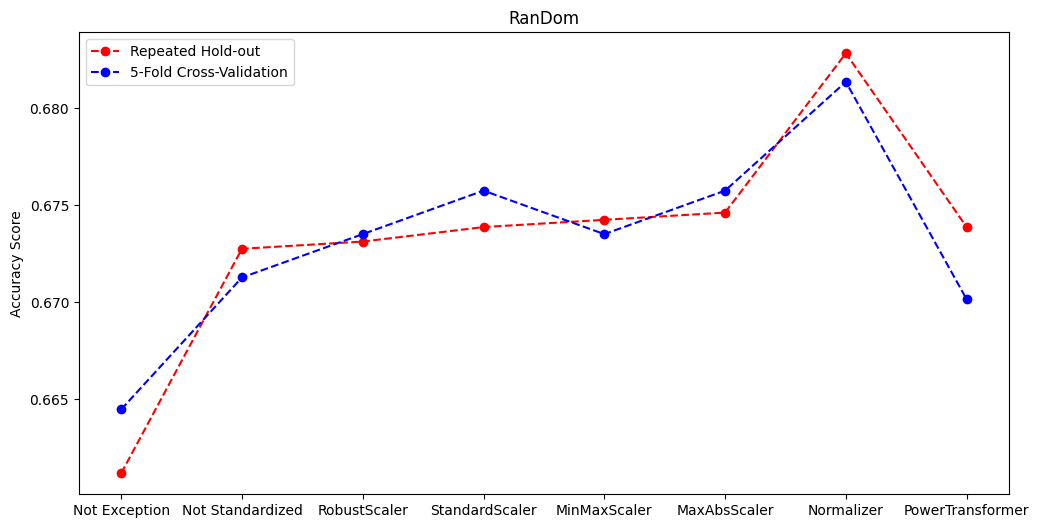

In [145]:
result.append(xuLy('RanDom'))

Mean                Accuracy    Cross Validate
----------------  ----------  ----------------
Not Exception       0.658582          0.658873
Not Standardized    0.670896          0.6724
RobustScaler        0.671642          0.671276
StandardScaler      0.671269          0.672387
MinMaxScaler        0.673881          0.6724
MaxAbsScaler        0.673507          0.672387
Normalizer          0.695896          0.686975
PowerTransformer    0.679104          0.672393


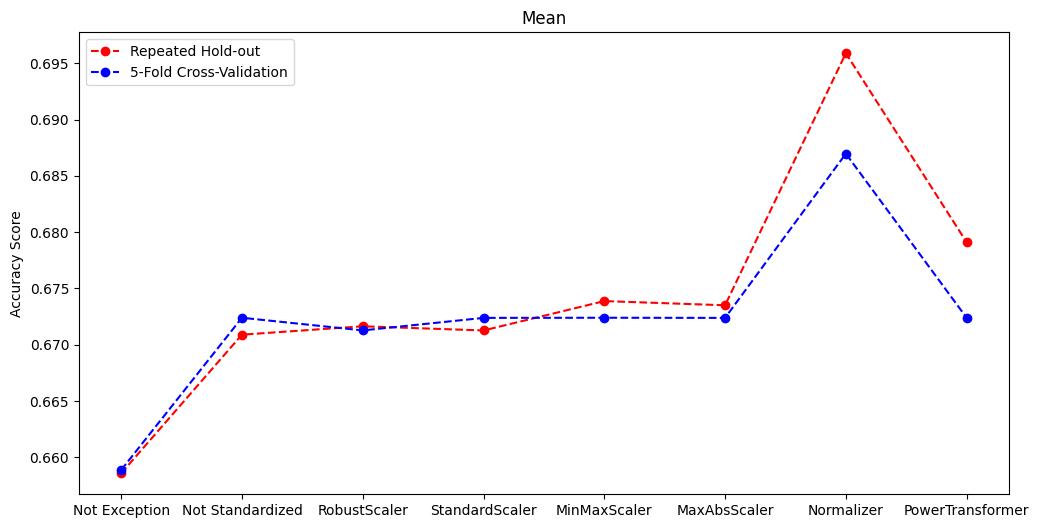

In [146]:
result.append(xuLy('Mean'))

Median              Accuracy    Cross Validate
----------------  ----------  ----------------
Not Exception       0.657836          0.659996
Not Standardized    0.672015          0.671276
RobustScaler        0.671642          0.671276
StandardScaler      0.671642          0.674628
MinMaxScaler        0.674254          0.671276
MaxAbsScaler        0.674627          0.674628
Normalizer          0.696642          0.688099
PowerTransformer    0.680224          0.673517


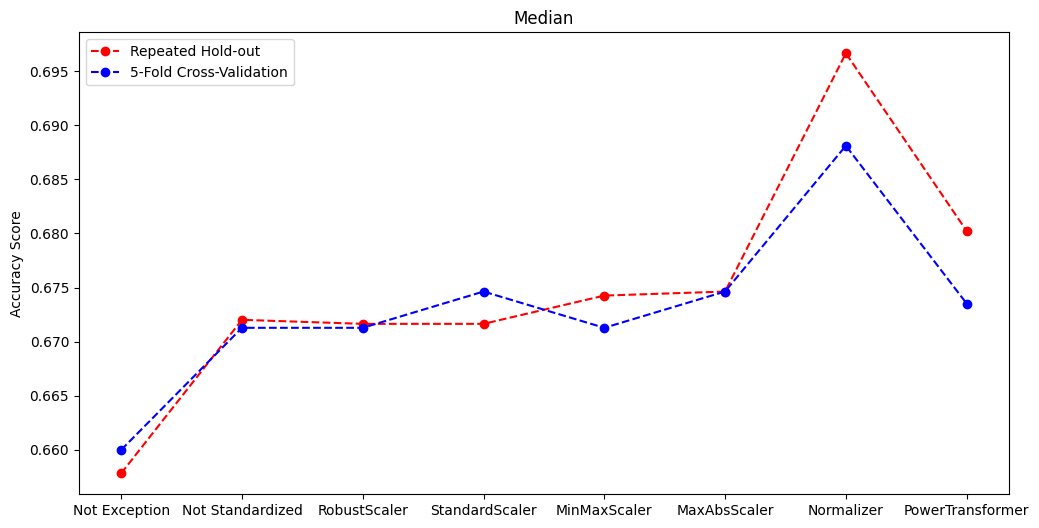

In [147]:
result.append(xuLy('Median'))

Mode                Accuracy    Cross Validate
----------------  ----------  ----------------
Not Exception       0.660821          0.662243
Not Standardized    0.672388          0.674641
RobustScaler        0.672388          0.674641
StandardScaler      0.672388          0.674628
MinMaxScaler        0.673507          0.674641
MaxAbsScaler        0.673507          0.674628
Normalizer          0.693284          0.690346
PowerTransformer    0.677985          0.6724


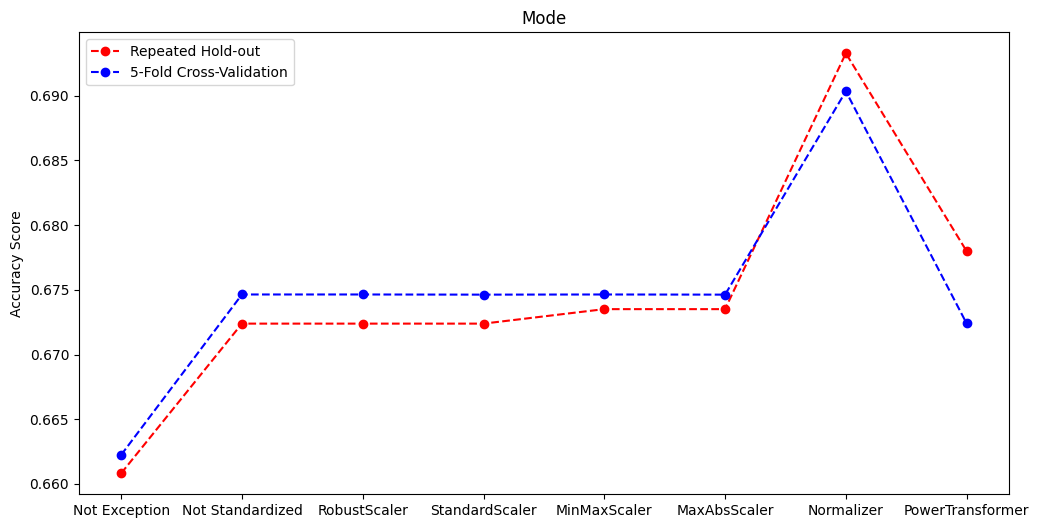

In [148]:
result.append(xuLy('Mode'))

EndOfDist           Accuracy    Cross Validate
----------------  ----------  ----------------
Not Exception       0.670896          0.667874
Not Standardized    0.674627          0.670171
RobustScaler        0.675             0.670171
StandardScaler      0.675             0.66569
MinMaxScaler        0.677612          0.670171
MaxAbsScaler        0.677612          0.66569
Normalizer          0.704478          0.694847
PowerTransformer    0.677985          0.672393


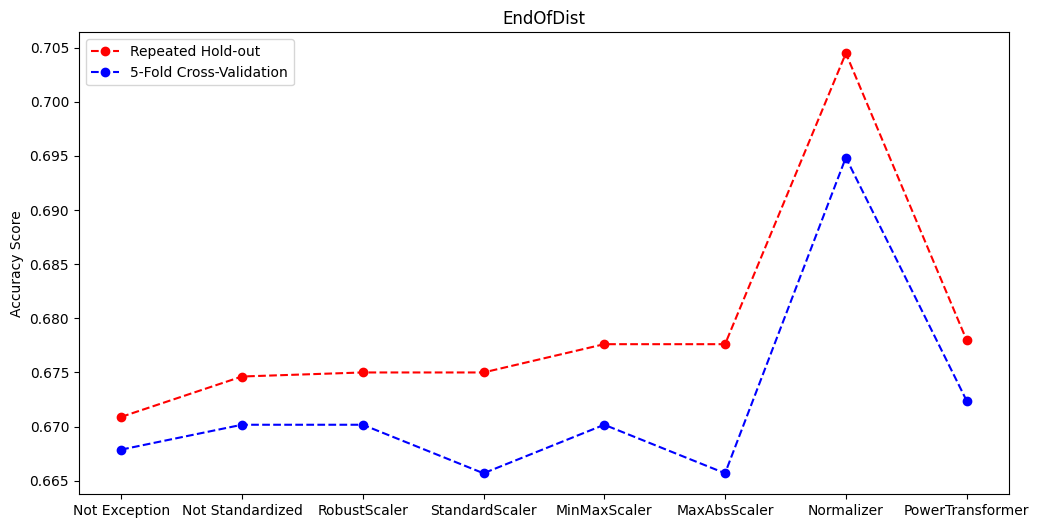

In [149]:
result.append(xuLy('EndOfDist'))

ArbitraryValue      Accuracy    Cross Validate
----------------  ----------  ----------------
Not Exception       0.66903           0.664497
Not Standardized    0.673881          0.669035
RobustScaler        0.673134          0.669035
StandardScaler      0.672388          0.670159
MinMaxScaler        0.673507          0.671282
MaxAbsScaler        0.673134          0.670159
Normalizer          0.697015          0.688111
PowerTransformer    0.68097           0.675764


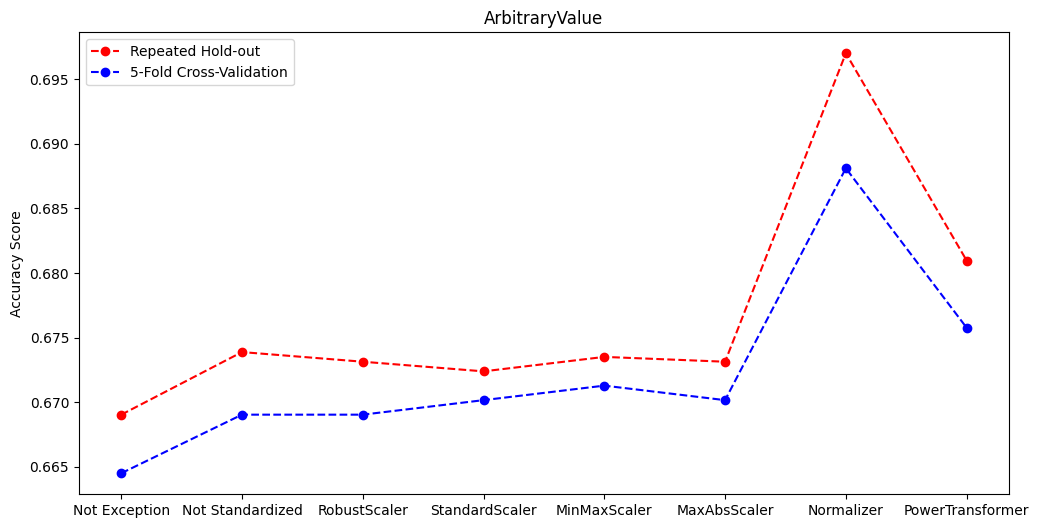

In [150]:
result.append(xuLy("ArbitraryValue"))

NewFeature          Accuracy    Cross Validate
----------------  ----------  ----------------
Not Exception       0.666418          0.662262
Not Standardized    0.670149          0.665664
RobustScaler        0.669403          0.665664
StandardScaler      0.669776          0.669041
MinMaxScaler        0.669776          0.665664
MaxAbsScaler        0.669776          0.669041
Normalizer          0.696642          0.688099
PowerTransformer    0.68097           0.674641


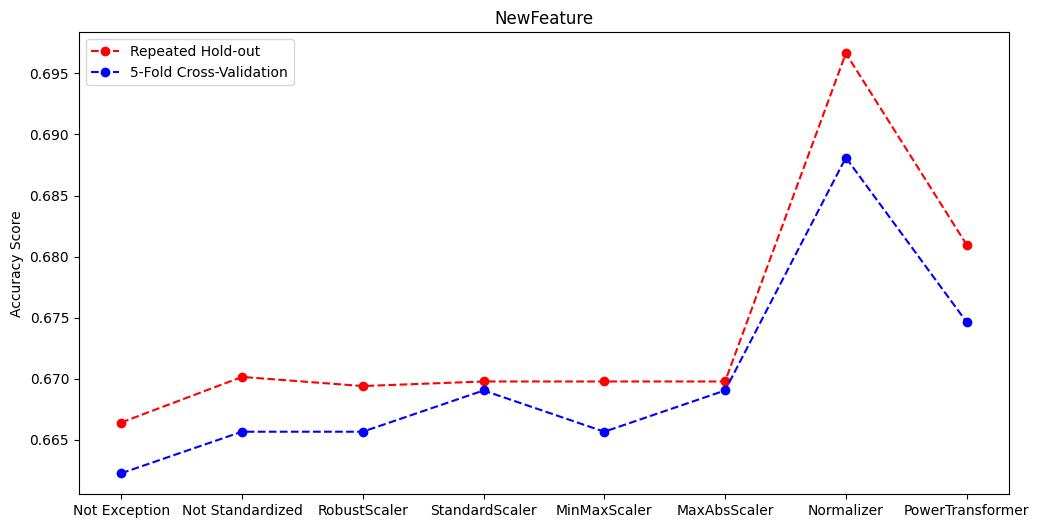

In [151]:
result.append(xuLy("NewFeature"))

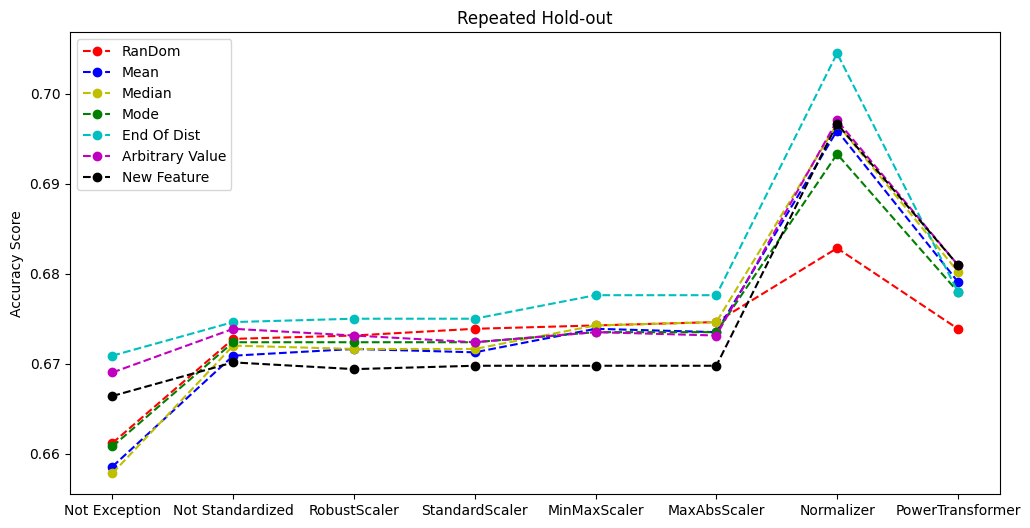

In [152]:
plt.figure(figsize=(12,6))
algorithms = ['Not Exception','Not Standardized', 'RobustScaler', 'StandardScaler','MinMaxScaler', 'MaxAbsScaler', 'Normalizer', 'PowerTransformer']
colors = ['r', 'b', 'y', 'g', 'c', 'm', 'k', 'purple']
labels = ['RanDom', 'Mean', 'Median', 'Mode', 'End Of Dist', 'Arbitrary Value', 'New Feature']
# Vẽ biểu đồ đường
for i in range(len(result)):
    plt.plot(algorithms, result[i][0], marker='o', linestyle='--', color=colors[i], label=labels[i])
# Thêm tiêu đề cho biểu đồ
plt.title('Repeated Hold-out')
# Thêm nhãn cho trục tung
plt.ylabel('Accuracy Score')
# Thêm chú thích
plt.legend()
# Hiển thị biểu đồ
plt.show()

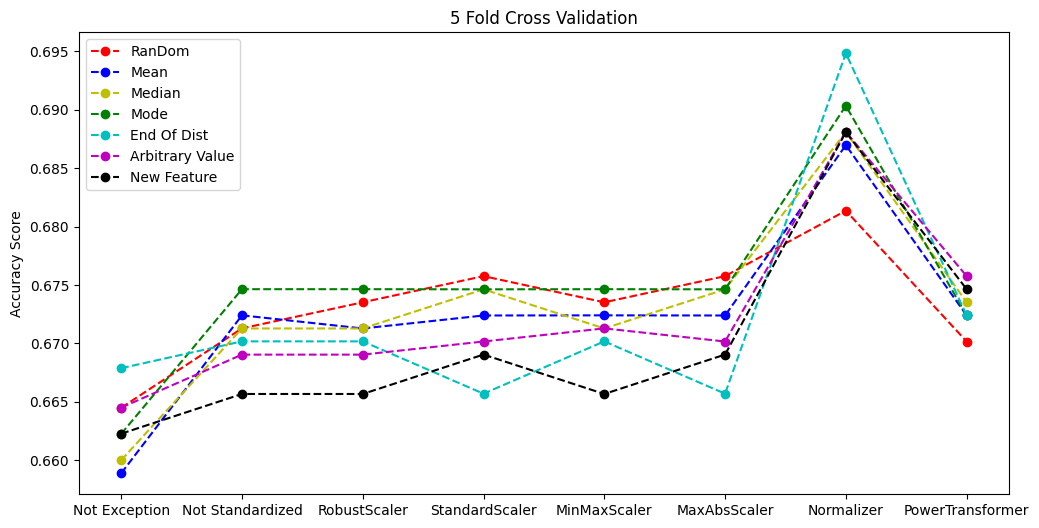

In [153]:
plt.figure(figsize=(12,6))
algorithms = ['Not Exception','Not Standardized', 'RobustScaler', 'StandardScaler','MinMaxScaler', 'MaxAbsScaler', 'Normalizer', 'PowerTransformer']
colors = ['r', 'b', 'y', 'g', 'c', 'm', 'k', 'purple']
labels = ['RanDom', 'Mean', 'Median', 'Mode', 'End Of Dist', 'Arbitrary Value', 'New Feature']
# Vẽ biểu đồ đường
for i in range(len(result)):
    plt.plot(algorithms, result[i][1], marker='o', linestyle='--', color=colors[i], label=labels[i])
# Thêm tiêu đề cho biểu đồ
plt.title('5 Fold Cross Validation')
# Thêm nhãn cho trục tung
plt.ylabel('Accuracy Score')
# Thêm chú thích
plt.legend()
# Hiển thị biểu đồ
plt.show()

### Feature Selection

In [154]:
def chuanHoaFeatureSelection(X_train, X_test, y_train, y_test, scaler_type):
    if scaler_type == 'standard':
        scaler = StandardScaler()
    elif scaler_type == 'minMax':
        scaler = MinMaxScaler()
    elif scaler_type == 'robust':
        scaler = RobustScaler()
    elif scaler_type == 'maxAbs':
        scaler = MaxAbsScaler()
    elif scaler_type == 'normalizer': 
        scaler = Normalizer()
    elif scaler_type == 'power':
        scaler = PowerTransformer()
    X_train[['Age', 'Fare']] = scaler.fit_transform(X_train[['Age', 'Fare']])
    X_test[['Age', 'Fare']] = scaler.transform(X_test[['Age', 'Fare']])
    classifier = LogisticRegression()
    classifier.fit(X_train, y_train)
    y_pred_robust = classifier.predict(X_test)
    return accuracy_score(y_test, y_pred_robust)
    

In [155]:
# Load Titanic dataset
titanic_data = pd.read_csv('titanic.csv')
dataFeature = titanic_data.copy()

# Drop unnecessary columns
dataFeature = dataFeature.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Convert categorical variables to numerical variables
dataFeature = pd.get_dummies(dataFeature, columns=['Sex', 'Embarked'])

arg=0
acc_robust = 0
acc_standard = 0
acc_minmax = 0
acc_maxAbs = 0
acc_normalizer = 0
acc_power = 0
# Split the data into input and target variables
X = dataFeature.drop(['Survived'], axis=1)
y = dataFeature['Survived']
for i in range(10):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)


    # Xử lý dữ liệu trống
    X_train, X_test = phuongPhap(X_train, X_test,'EndOfDist')

    # Xử lý ngoại lệ
    X_train, X_test = phanPhoiChuan(X_train, X_test)
    X_train, X_test = phanPhoiLech(X_train, X_test)


    # Train the Random Forest model
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    # Lay ra cac dac trung quan trong
    importances = pd.DataFrame({'feature': X_train.columns, 'importance': rf.feature_importances_})
    # Set the threshold for importance
    threshold = 0.05
    # Lay ra cac dac trung duoi nguong
    low_importance_features = importances.loc[importances['importance'] < threshold, 'feature'].tolist()
    X_train.drop(low_importance_features, axis=1, inplace=True)
    X_test.drop(low_importance_features, axis=1, inplace=True)



    # Chưa chuẩn hóa
    arg += resultPredict(X_train, X_test, y_train, y_test)
    # Sử dụng RobustScaler
    acc_robust += chuanHoaFeatureSelection(X_train, X_test, y_train, y_test, 'robust')
    # Sử dụng StandardScaler
    acc_standard += chuanHoaFeatureSelection(X_train, X_test, y_train, y_test, 'standard')
    # Sử dụng MinMaxScaler
    acc_minmax += chuanHoaFeatureSelection(X_train, X_test, y_train, y_test, 'minMax')
    # Sử dụng MaxAbsScaler
    acc_maxAbs += chuanHoaFeatureSelection(X_train, X_test, y_train, y_test, 'maxAbs')
    # Sử dụng Normalizer
    acc_normalizer += chuanHoaFeatureSelection(X_train, X_test,y_train, y_test, 'normalizer')
    # Sử dụng PowerTransformer
    acc_power += chuanHoaFeatureSelection(X_train, X_test, y_train, y_test, 'power')
print("arg: {:.4%}".format(arg/10))
print("RobustScaler: {:.4%}".format(acc_robust/10))
print("StandardScaler: {:.4%}".format(acc_standard/10))
print("MinMaxScaler: {:.4%}".format(acc_minmax/10))
print("MaxAbsScaler: {:.4%}".format(acc_maxAbs/10))
print("Normalizer: {:.4%}".format(acc_normalizer/10))
print("PowerTransformer: {:.4%}".format(acc_power/10))

# Calculate feature importances for the reduced feature set
# importances_reduced = pd.DataFrame({'feature': X_train.columns, 'importance': rf.feature_importances_})

# Print the feature importances for both the original and reduced feature sets
# print("Original Feature Importances:")
# print(importances)
# print("Reduced Feature Importances:")
# print(importances_reduced)

c:\Users\Do Thien Hoa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


arg: 78.5075%
RobustScaler: 78.6194%
StandardScaler: 78.5821%
MinMaxScaler: 79.0299%
MaxAbsScaler: 79.0299%
Normalizer: 79.4403%
PowerTransformer: 79.3657%


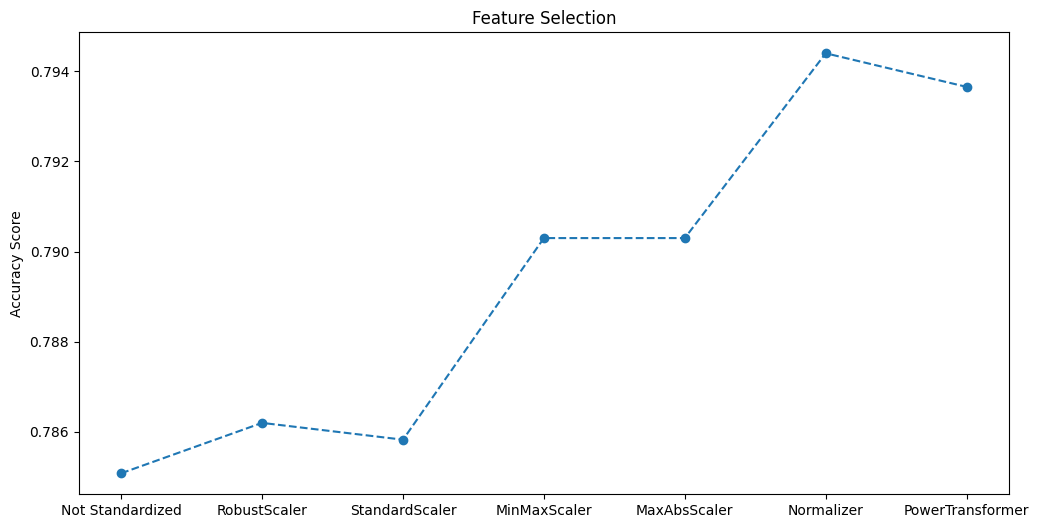

In [156]:
plt.figure(figsize=(12,6))
algorithms = ['Not Standardized', 'RobustScaler', 'StandardScaler','MinMaxScaler', 'MaxAbsScaler', 'Normalizer', 'PowerTransformer']
resultFeature=[arg/10,acc_robust/10,acc_standard/10,acc_minmax/10,acc_maxAbs/10,acc_normalizer/10,acc_power/10]
# Vẽ biểu đồ đường
plt.plot(algorithms, resultFeature, marker='o', linestyle='--')
# Thêm tiêu đề cho biểu đồ
plt.title('Feature Selection')
# Thêm nhãn cho trục tung
plt.ylabel('Accuracy Score')
# Hiển thị biểu đồ
plt.show()

### Tìm bộ siêu tham số tối ưu

param_C         0.001     0.010     0.100     1.000     10.000    100.000
param_penalty                                                            
l1             0.616374  0.616374  0.661303  0.677510  0.674374  0.679174
l2             0.616374  0.616374  0.667755  0.675897  0.674361  0.677574


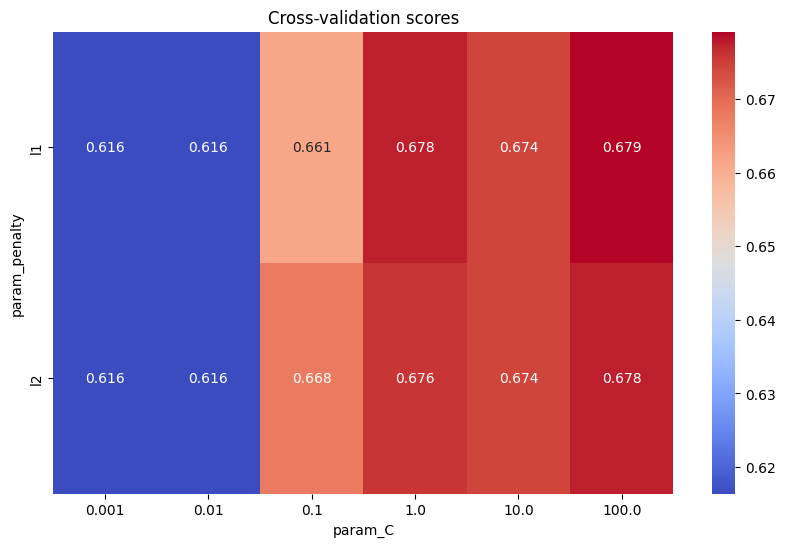

Best penalty: l1
Best C: 100
0.7238805970149254


In [157]:
X = data[['Age', 'Fare']].copy()
y = data['Survived'].copy()

# Chia bộ dữ liệu thành Training set và Test set
#arg = 0
#for i in range(10):
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, stratify=y, random_state=29)

# Xu ly ngoai le
uppper_boundary = X_train['Age'].mean() + 3 * X_train['Age'].std()
lower_boundary = X_train['Age'].mean() - 3 * X_train['Age'].std()
X_train.loc[X_train['Age'] >= math.floor(
        uppper_boundary), 'Age'] = math.floor(uppper_boundary)
X_test.loc[X_test['Age'] >= math.floor(
        uppper_boundary), 'Age'] = math.floor(uppper_boundary)

IQR = X_test.Fare.quantile(0.75)-X_test.Fare.quantile(0.25)
lower_bridge = X_test['Fare'].quantile(0.25)-(IQR*3)
upper_bridge = X_test['Fare'].quantile(0.75)+(IQR*3)

X_train.loc[X_train['Fare'] >= math.floor(
        upper_bridge), 'Fare'] = math.floor(upper_bridge)
X_test.loc[X_test['Fare'] >= math.floor(
        upper_bridge), 'Fare'] = math.floor(upper_bridge)

X_train['Age'].fillna(math.floor(uppper_boundary), inplace=True)
X_test['Age'].fillna(math.floor(uppper_boundary), inplace=True)
# Handling outliers
scaler = Normalizer()
X_train[['Age', 'Fare']] = scaler.fit_transform(X_train[['Age', 'Fare']])
X_test[['Age', 'Fare']] = scaler.transform(X_test[['Age', 'Fare']])

# Lựa chọn mô hình hồi quy logistic có bộ siêu tham số tối ưu
param_grid = {'penalty': ['l1', 'l2'],
                  'C': [0.001, 0.01, 0.1, 1, 10, 100]}
lr = LogisticRegression(solver='liblinear')
clf = GridSearchCV(lr, param_grid, cv=5)
clf.fit(X_train, y_train)
# In các bảng
results = pd.DataFrame(clf.cv_results_)
scores = results[['param_penalty', 'param_C', 'mean_test_score']]
scores_pivot = pd.pivot_table(scores, index='param_penalty', columns='param_C', values='mean_test_score')
print(scores_pivot)
# Xuất đồ thị
plt.figure(figsize=(10, 6))
sns.heatmap(scores_pivot, annot=True, cmap='coolwarm', fmt='.3g')
plt.title('Cross-validation scores')
plt.xlabel('param_C')
plt.ylabel('param_penalty')
plt.show()
# In ra bộ siêu tham số tối ưu
print('Best penalty:', clf.best_estimator_.get_params()['penalty'])
print('Best C:', clf.best_estimator_.get_params()['C'])

# Huấn luyện mô hình với bộ siêu tham số tối ưu
lr = LogisticRegression(solver='liblinear', penalty=clf.best_estimator_.get_params()[
                            'penalty'], C=clf.best_estimator_.get_params()['C'])
lr.fit(X_train, y_train)

# Tính độ chính xác dự đoán của mô hình đã xây dựng trên Test set
accuracy = lr.score(X_test, y_test)
accuracy = resultPredict(X_train, X_test, y_train, y_test) 
print('Accuracy:{:.4%}'.format(accuracy))
#print('====================================================================================')
#arg /= 10
#print(arg)


In [158]:
print('Accuracy:{:.4%}'.format(result[4][0][6]))

Accuracy:70.4478%


param_C         0.001     0.010     0.100     1.000     10.000    100.000
param_penalty                                                            
l1             0.616374  0.616374  0.770413  0.770452  0.780129  0.776916
l2             0.616374  0.744813  0.772000  0.767252  0.775303  0.778516


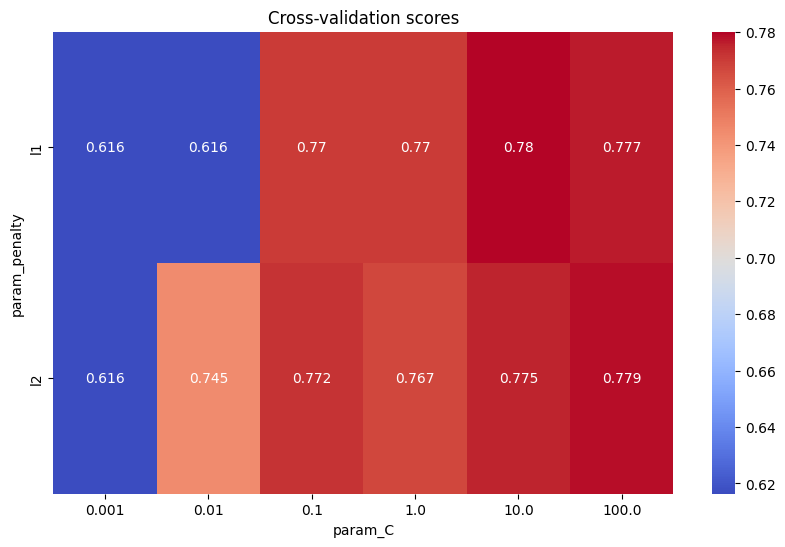

Best penalty: l1
Best C: 10
Accuracy:81.3433%


In [159]:
# Load Titanic dataset
titanic_data = pd.read_csv('titanic.csv')
data = titanic_data.copy()

# Drop unnecessary columns
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Convert categorical variables to numerical variables
data = pd.get_dummies(data, columns=['Sex', 'Embarked'])

# Split the data into input and target variables
X = data.drop(['Survived'], axis=1)
y = data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=65, stratify=y)


# Xử lý dữ liệu trống
X_train, X_test = phuongPhap(X_train, X_test,'EndOfDist')

# Xử lý ngoại lệ
X_train, X_test = phanPhoiChuan(X_train, X_test)
X_train, X_test = phanPhoiLech(X_train, X_test)


# Train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
# Calculate feature importances
importances = pd.DataFrame({'feature': X_train.columns, 'importance': rf.feature_importances_})
# Set the threshold for importance
threshold = 0.05
# Get the low importance features and remove them from the dataset
low_importance_features = importances.loc[importances['importance'] < threshold, 'feature'].tolist()
X_train.drop(low_importance_features, axis=1, inplace=True)
X_test.drop(low_importance_features, axis=1, inplace=True)

# Handling outliers
scaler = Normalizer()
X_train[['Age', 'Fare']] = scaler.fit_transform(X_train[['Age', 'Fare']])
X_test[['Age', 'Fare']] = scaler.transform(X_test[['Age', 'Fare']])

# Lựa chọn mô hình hồi quy logistic có bộ siêu tham số tối ưu
param_grid = {'penalty': ['l1', 'l2'],
                  'C': [0.001, 0.01, 0.1, 1, 10, 100]}
lr = LogisticRegression(solver='liblinear')
clf = GridSearchCV(lr, param_grid, cv=5)
clf.fit(X_train, y_train)
# In các giá trị trung bình của cross-validation trên bảng
results = pd.DataFrame(clf.cv_results_)
scores = results[['param_penalty', 'param_C', 'mean_test_score']]
scores_pivot = pd.pivot_table(scores, index='param_penalty', columns='param_C', values='mean_test_score')
print(scores_pivot)

#Ve do thi
plt.figure(figsize=(10, 6))
sns.heatmap(scores_pivot, annot=True, cmap='coolwarm', fmt='.3g')
plt.title('Cross-validation scores')
plt.xlabel('param_C')
plt.ylabel('param_penalty')
plt.show()
# In ra bộ siêu tham số tối ưu
print('Best penalty:', clf.best_estimator_.get_params()['penalty'])
print('Best C:', clf.best_estimator_.get_params()['C'])

# Huấn luyện mô hình với bộ siêu tham số tối ưu
lr = LogisticRegression(solver='liblinear', penalty=clf.best_estimator_.get_params()[
                            'penalty'], C=clf.best_estimator_.get_params()['C'])
lr.fit(X_train, y_train)

# Tính độ chính xác dự đoán của mô hình đã xây dựng trên Test set
accuracy = lr.score(X_test, y_test)
#arg += accuracy
print('Accuracy:{:.4%}'.format(accuracy))
#print('====================================================================================')
#arg /= 10
#print(arg)


In [160]:
print("Normalizer: {:.4%}".format(acc_normalizer/10))

Normalizer: 79.4403%
